# Part II - (Data Analysis/Data Visualization Report on Ford GoBike System February, 2019)
## by (Cyril Ocloo)


## Investigation Overview

In this investigation, I will take a look at the bike ride trends and customer behaviour characteristics of the bay Area bike share system . I will specifically focus on how gender, age group, biking duration, the time (weekday, hour), and the user types impacts usage of the system.



## Dataset Overview

> The FordGobike dataset was collected efficiently and effectively and provides relevant features which is pretty easy to understand.
The dataset uses data collected in different location in the San Francisco Bay area of California in the month February 2019. The dataset contains approximately 183400 bike riders infomation. The features included the trip start and end time, user type, gender, and age. The dataset had some missing values and outliers which was removed from the analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('gobike_master.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_dayofweek,duration_min,start_hour,duration_min_int,member_age_group
0,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,45,Thu,26.416667,23,26,36-45
1,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,60,Thu,29.883333,23,29,46-60
2,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Subscriber,1983.0,Female,No,36,Thu,19.116667,23,19,36-45
3,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1989.0,Male,No,30,Thu,26.916667,23,26,26-35
4,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1988.0,Other,No,31,Thu,26.166667,23,26,26-35


## (Visualization 1)


## Number of bike trip by user type Visualization

Ford Gobike system has 2 user types. Users with a monthly membership/subscription known as ("Subscriber") make up 90% of all users in Feb 2019. On the other hand users ride casually of occationally known as ("Customer") constitute of 9% of all users.

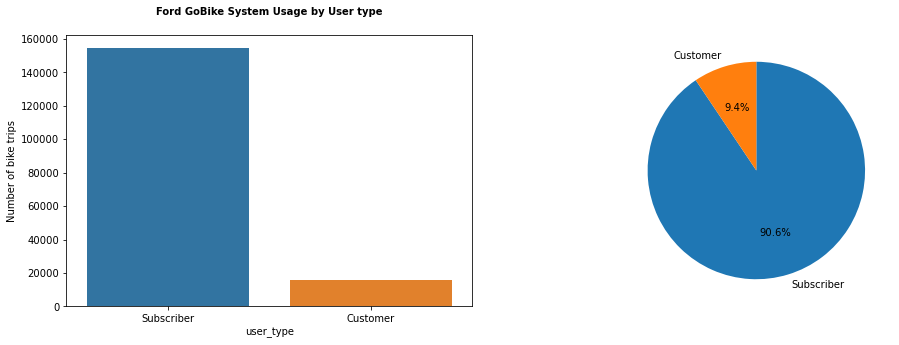

In [3]:
plt.figure(figsize = [16, 5])
# Bar plot of user types
plt.subplot(1, 2, 1)
sb.countplot(data=df, x='user_type')
plt.ylabel("Number of bike trips");
plt.title("Ford GoBike System Usage by User type", y=1.05, fontsize=10, fontweight='bold')
# Pie chart of user types
plt.subplot(1, 2, 2)
plt.pie(df.user_type.value_counts(),labels = df.user_type.value_counts().index, autopct='%1.1f%%', startangle = 90, counterclock = False);


## (Visualization 2)

## Bike Usage by Duration time Visualization 

From the visualization below, it can be observed that the pre transformed duration minutes data is skewed to the right with bikers duration minutes ranging form 1 to 99 minutes, a mean of 10 minutes and median of 8 minutes.

In [4]:
# Define function for plot labels and title to avoid repetition
def x_y_t(xL,yL,title):
    plt.title(title,y=1.05, fontsize=12, fontweight='bold')
    plt.xlabel(xL)
    plt.ylabel(yL)
base_color=sb.color_palette()[2]

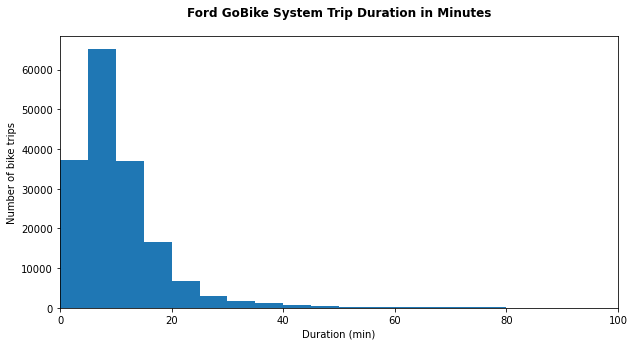

In [5]:
plt.figure(figsize = [10, 5])
bins=np.arange(0,df['duration_min'].max()+5,5)

plt.hist(data=df, x='duration_min',bins=bins);
plt.xlim(0, 100)
x_y_t('Duration (min)',"Number of bike trips",'Ford GoBike System Trip Duration in Minutes')
#plt.xticks(rotation=90);

The data is then transformed to make data visualization and data interpretation easier. A log scale transformation is used.

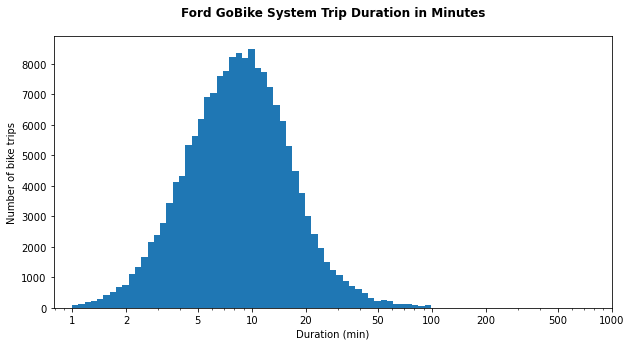

In [6]:
plt.figure(figsize = [10, 5])

#Axis transformation
df['duration_min'] = df['duration_min'].astype('float')
#Set log binsize to 0.03
bins= 10**np.arange(0,np.log10(df.duration_min.max())+0.035,0.035)
plt.hist(data=df,x='duration_min', bins=bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]);
x_y_t('Duration (min)',"Number of bike trips",'Ford GoBike System Trip Duration in Minutes')

    

## (Visualization 3)


### Daily bike usage by user type Visualization

Features investigated include the following: Start Time Hour, User Type, Member Age Group, Member Gender and Start Time DayofWeek.
- Thursday records the highest number of bike trips for both customers and subscribers
- Most subscribers user the bike system usually at 8 am and 5 pm, while customers usualy ride the bikes at 5 pm.
- Subscribers and customers who fall within the age group of 26-35 years old use the Gobike sharing system more.
- Customers of all age group (except 46-60) turn to use the Gobike system more over the weekend which is explained by the increase in number of bike trips from Saturday to Sunday
- Both male subscribers and customers ride the bikes more.
- Both female customers and subscribers take longer trips than other genders even though male subscribers and customers take more trips.
- Customers who fall within the age group of 15-25 years old take longer bike trips than other age groups while subscribers who fall within the age group of 46-60 years old take longer bike trips than other age groups.

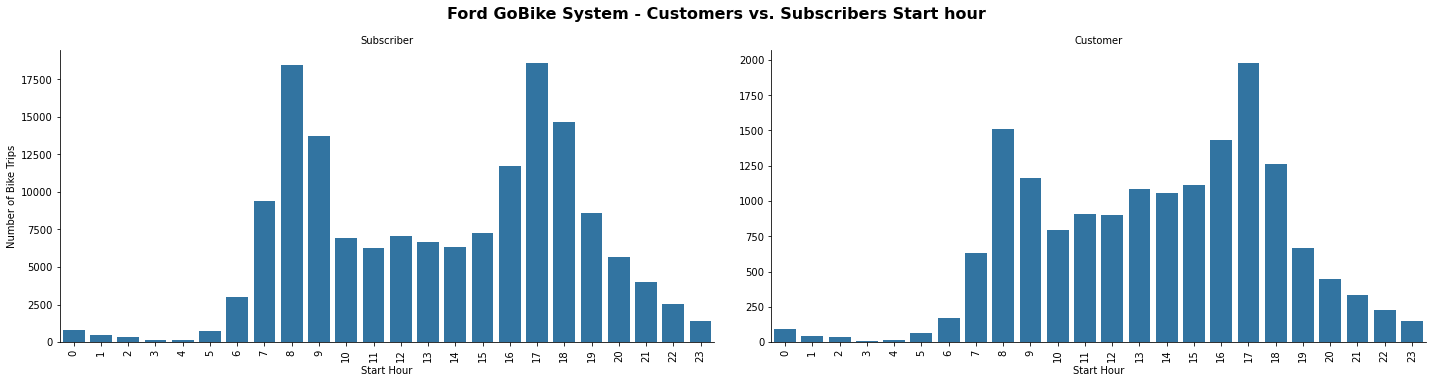

In [7]:
# Customer Usage by Weekday vs. Subscriber Usage by start time hour
# Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]
graph = sb.catplot(data=df, x = 'start_hour', col='user_type', kind='count', sharey = False, color = base_color, height=5, aspect=2);

graph.set_axis_labels('Start Hour', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers Start hour', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=90);

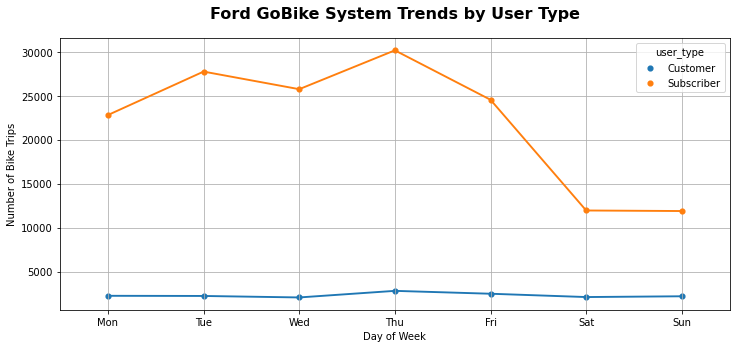

In [8]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(12, 5))

df_cleaned_user_week = df.groupby(['start_dayofweek', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_cleaned_user_week, x='start_dayofweek', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Number of Bike Trips');
plt.grid()

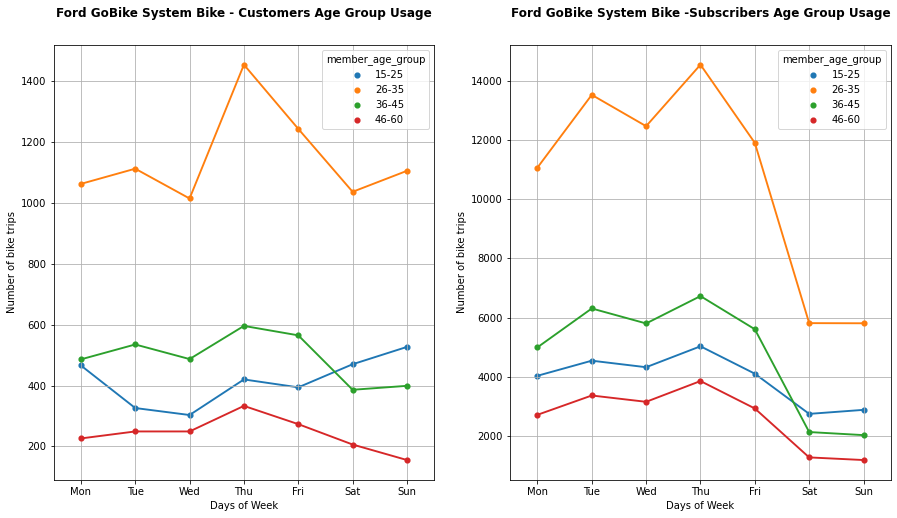

In [9]:
plt.figure(figsize = [15, 8])

plt.subplot(1, 2, 1)
df_cleaned_cus_user_week = df[df['user_type'] == 'Customer'].groupby(['start_dayofweek', 'member_age_group']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_cleaned_cus_user_week, x='start_dayofweek', y=0, hue = 'member_age_group', scale=.7, order = weekday);
x_y_t('Days of Week',"Number of bike trips",'Ford GoBike System Bike - Customers Age Group Usage')
plt.grid()

plt.subplot(1, 2, 2)
df_cleaned_sub_user_week = df[df['user_type'] == 'Subscriber'].groupby(['start_dayofweek', 'member_age_group']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_cleaned_sub_user_week, x='start_dayofweek', y=0, hue = 'member_age_group', scale=.7, order = weekday);
x_y_t('Days of Week',"Number of bike trips",'Ford GoBike System Bike -Subscribers Age Group Usage')
plt.grid()

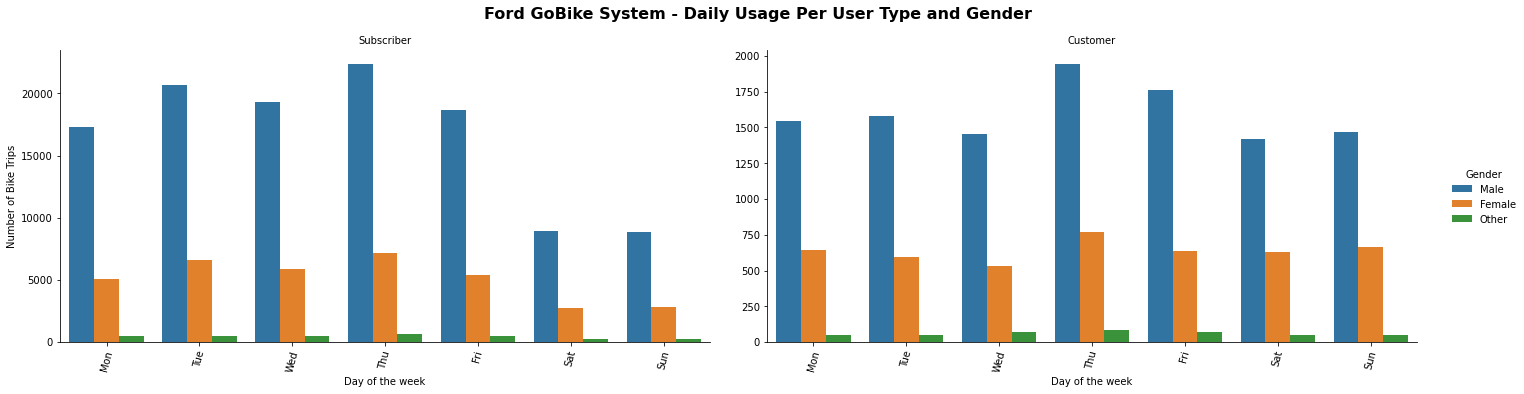

In [10]:
# Monthly usage - user type and gender
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

graph = sb.catplot(data=df, x='start_dayofweek', col="user_type", hue="member_gender",order=weekday, kind='count', sharey = False, height=5, aspect=2);

graph.set_axis_labels("Day of the week", "Number of Bike Trips")
graph._legend.set_title('Gender')
graph.set_titles("{col_name}")

graph.fig.suptitle('Ford GoBike System - Daily Usage Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

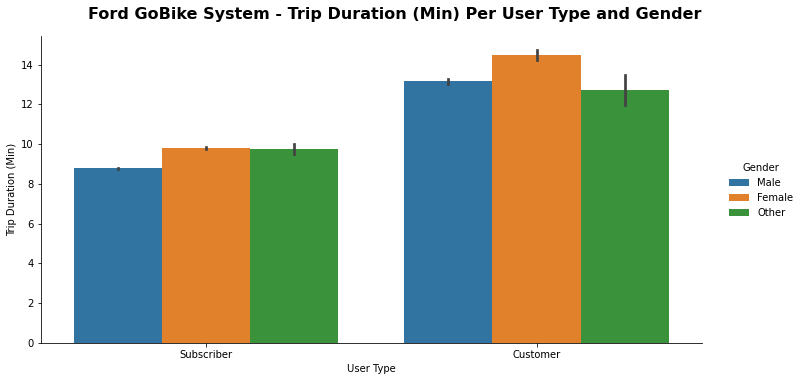

In [11]:
# Bar Chart- duration (min) per user type and gender
data = df.query('duration_min_int < 40')
graph = sb.catplot(data=data, x='user_type', y="duration_min_int", hue="member_gender", kind="bar", height=5, aspect=2);

graph.set_axis_labels("User Type", "Trip Duration (Min)")
graph._legend.set_title('Gender')
graph.fig.suptitle('Ford GoBike System - Trip Duration (Min) Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

In [12]:
# Create Bin edges to "cut" the age data into groups('15-25','26-35','36-45','46-60')
bin_edges = [ 15 ,25 , 35, 45,60] 
bin_names=['15-25','26-35','36-45','46-60']
df['member_age_group']=pd.cut(df['member_age'],bin_edges,labels=bin_names)

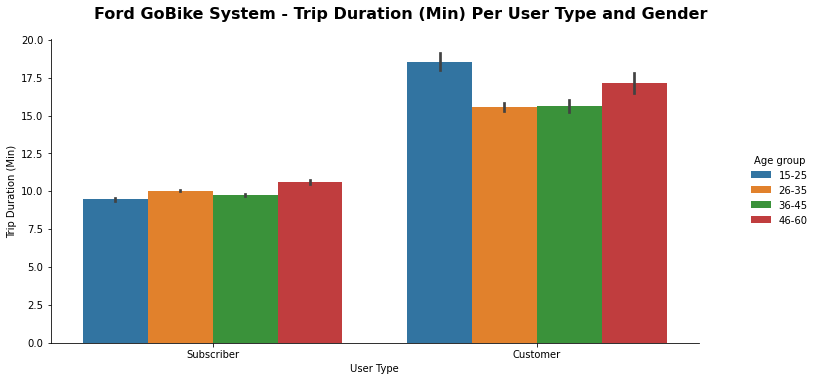

In [13]:

graph = sb.catplot(data=df, x='user_type', y="duration_min", hue="member_age_group", kind="bar" , sharey= False, height=5, aspect=2);

graph.set_axis_labels("User Type", "Trip Duration (Min)")
graph._legend.set_title('Age group')
graph.fig.suptitle('Ford GoBike System - Trip Duration (Min) Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

In [16]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 866020 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\w10014629\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\w10014629\Anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\w10014629\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\w10014629\AppData\Roaming\Python\Python39\site-packages\nbconvert\nbconvertapp.py", line 414, in start
    self.convert_notebooks()
  File "C:\Users\w10014629\AppData\Roaming\Python\Python39\site-packages\nbconvert\nbconvertapp.py", line 588, in conv